In [1]:
import matplotlib
import matplotlib.pyplot as plt
import librosa, librosa.display
import numpy as np, scipy
from os import listdir

In [2]:
# Constants
SPEC_FMIN = librosa.note_to_hz(['A0'])[0]
HOP_LENGTH = 512
BINS_PER_OCTAVE = 36
SAMPLE_RATE = 22050

MIDI_MIN = librosa.note_to_midi('A0')
MIDI_MAX = librosa.note_to_midi('C8')


In [140]:
def create_spectrogram(wav_matrix):
    """Create spectrogram from given audio matrix"""
    logC = librosa.amplitude_to_db(wav_matrix)
    librosa.display.specshow(
        logC,
        sr=SAMPLE_RATE,
        x_axis='time',
        y_axis='cqt_note',
    )
#   plt.axis('off')
    plt.savefig(fname='1.jpeg', format='jpg')

def cqt_matrix(wav_file):
    x, sr = librosa.load(wav_file)
    
    if(sr != SAMPLE_RATE):
        x = librosa.resample(x, sr, SAMPLE_RATE)
    
    C = librosa.cqt(x, 
                    sr=SAMPLE_RATE, 
                    fmin=SPEC_FMIN,
                    bins_per_octave=BINS_PER_OCTAVE,
                    hop_length=HOP_LENGTH,
                    n_bins=264
                   )
#     logC = librosa.amplitude_to_db(np.abs(C))
#     return logC
    return np.abs(C)

def split_wav(wav_matrix, slice_shift=2):
    """Split loaded WAV file into many chunks with specified padding"""
    specs = []
    for i in range(2, wav_matrix[0].size-1):
        specs.append(wav_matrix[:, i-slice_shift:i+slice_shift+1])
    return specs

In [7]:
# path = 'D:\School\Bc\model\MAPS\AkPnBcht\MUS'
# specs = 'D:\School\Bc\model\spectrograms'
# files = listdir(path)

# wavs = [wav for wav in files if wav.endswith('.wav')]

In [13]:
# cqt = cqt_matrix('D:\School\Bc\model\MAPS\AkPnBcht\MUS\MAPS_MUS-grieg_walzer_AkPnBcht.wav')

(array([1.117308e+06, 6.108500e+04, 2.262700e+04, 1.282500e+04,
        9.209000e+03, 6.813000e+03, 4.932000e+03, 3.633000e+03,
        2.725000e+03, 2.346000e+03, 2.084000e+03, 1.695000e+03,
        1.374000e+03, 1.119000e+03, 8.580000e+02, 7.510000e+02,
        5.830000e+02, 5.230000e+02, 4.760000e+02, 4.630000e+02,
        3.740000e+02, 3.830000e+02, 3.010000e+02, 2.350000e+02,
        2.040000e+02, 1.950000e+02, 1.620000e+02, 1.070000e+02,
        1.260000e+02, 8.100000e+01, 6.300000e+01, 5.200000e+01,
        4.700000e+01, 3.200000e+01, 1.600000e+01, 1.000000e+01,
        5.000000e+00, 5.000000e+00, 5.000000e+00, 3.000000e+00,
        3.000000e+00, 0.000000e+00, 3.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00]),
 array([0.        , 0.01029483, 0.02058967, 0.0308845 , 0.04117934,
        0.05147417, 0.061769  , 0.07206384, 0.08235867, 0.0926535 ,
        0.10294834, 0.11324317, 0.12353801, 0.13383284, 0.

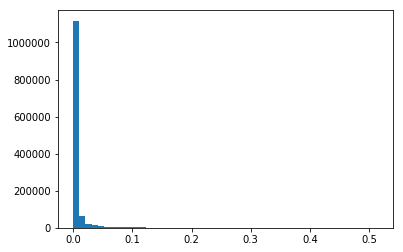

In [72]:
# Distribution of cqt matrix
# plt.hist(np.concatenate(cqt[:, :]), bins=50)

In [113]:
# shift = 10e-07
# box_cqt = []
# for i in cqt:
#     for j in i:
#         if j == 0:
#             box_cqt.append(shift)
#         else:
#             box_cqt.append(j)

# from scipy import stats
# train_data, fitted_lambda = stats.boxcox(box_cqt)

(array([3.60000e+01, 2.00000e+00, 3.90000e+01, 4.00000e+01, 5.40000e+01,
        9.00000e+00, 1.30000e+01, 3.60000e+01, 5.80000e+01, 4.30000e+01,
        2.30000e+01, 3.80000e+01, 1.60000e+01, 3.50000e+01, 7.90000e+01,
        8.10000e+01, 5.50000e+01, 8.50000e+01, 1.96000e+02, 3.17000e+02,
        3.91000e+02, 4.61000e+02, 1.74680e+04, 2.65600e+03, 7.06900e+03,
        1.30570e+04, 1.97410e+04, 2.91600e+04, 4.41960e+04, 6.61320e+04,
        9.26070e+04, 1.19919e+05, 1.29415e+05, 1.22329e+05, 1.04487e+05,
        9.77840e+04, 8.74530e+04, 7.59910e+04, 6.23540e+04, 4.75660e+04,
        3.27160e+04, 2.34220e+04, 1.75030e+04, 1.48810e+04, 1.04150e+04,
        7.64200e+03, 4.36500e+03, 2.57300e+03, 8.06000e+02, 3.40000e+01]),
 array([-1.35, -1.31, -1.27, -1.23, -1.19, -1.15, -1.11, -1.07, -1.03,
        -0.99, -0.95, -0.91, -0.87, -0.83, -0.79, -0.75, -0.71, -0.67,
        -0.63, -0.59, -0.55, -0.51, -0.47, -0.43, -0.39, -0.35, -0.31,
        -0.27, -0.23, -0.19, -0.15, -0.11, -0.07, -0.03

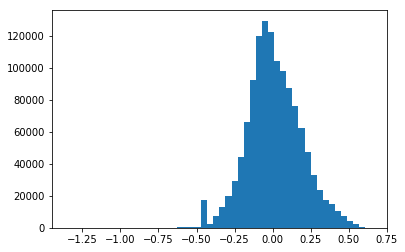

In [137]:
# m = np.max(train_data)
# n = np.min(train_data)
# d = m-n;

# norm = [2*((x-n)/d)-1.35 for x in train_data]

# plt.hist(norm, bins=50)
# sps = split_wav(cqt_matrix('D:\School\Bc\model\MAPS\AkPnBcht\MUS\MAPS_MUS-grieg_walzer_AkPnBcht.wav'))

In [138]:

# for i in range(20):
#     librosa.display.specshow(
#         sps[i],
#         sr=SAMPLE_RATE,
#         x_axis='time',
#         y_axis='cqt_note',
#     )
#     plt.show()